In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import plotly.graph_objs as go
import plotly.offline as py
warnings.filterwarnings("ignore")

In [2]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=(15,8)
plt.rcParams['font.size']=18

In [3]:
# reading dataset
df = pd.read_csv("SCMS_Delivery_History_Dataset.csv")

In [4]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [5]:
df.tail()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03
10323,86823,103-ZW-T30,FPQ-15197,SO-50022,DN-4336,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,36639,72911.61,1.99,0.03,"Cipla, Goa, India",No,Weight Captured Separately,Freight Included in Commodity Cost,85.82


In [6]:
print(f"Total No of Rows: {df.shape[0]} and Columns: {df.shape[1]}")

Total No of Rows: 10324 and Columns: 33


In [7]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [8]:
# total no of unique values in each columns
df.nunique()

ID                              10324
Project Code                      142
PQ #                             1237
PO / SO #                        6233
ASN/DN #                         7030
Country                            43
Managed By                          4
Fulfill Via                         2
Vendor INCO Term                    8
Shipment Mode                       4
PQ First Sent to Client Date      765
PO Sent to Vendor Date            897
Scheduled Delivery Date          2006
Delivered to Client Date         2093
Delivery Recorded Date           2042
Product Group                       5
Sub Classification                  6
Vendor                             73
Item Description                  184
Molecule/Test Type                 86
Brand                              48
Dosage                             54
Dosage Form                        17
Unit of Measure (Per Pack)         31
Line Item Quantity               5065
Line Item Value                  8741
Pack Price  

In [9]:
# checking for null values
df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [10]:
#null values in %ages
df.isnull().mean()*100

ID                               0.000000
Project Code                     0.000000
PQ #                             0.000000
PO / SO #                        0.000000
ASN/DN #                         0.000000
Country                          0.000000
Managed By                       0.000000
Fulfill Via                      0.000000
Vendor INCO Term                 0.000000
Shipment Mode                    3.487021
PQ First Sent to Client Date     0.000000
PO Sent to Vendor Date           0.000000
Scheduled Delivery Date          0.000000
Delivered to Client Date         0.000000
Delivery Recorded Date           0.000000
Product Group                    0.000000
Sub Classification               0.000000
Vendor                           0.000000
Item Description                 0.000000
Molecule/Test Type               0.000000
Brand                            0.000000
Dosage                          16.815188
Dosage Form                      0.000000
Unit of Measure (Per Pack)       0

**Obsveration**
1. Dosage has highest no if null values around 17%
2. shipment cost and line Item Insurance has similar no of null values on average of 3%


<AxesSubplot:>

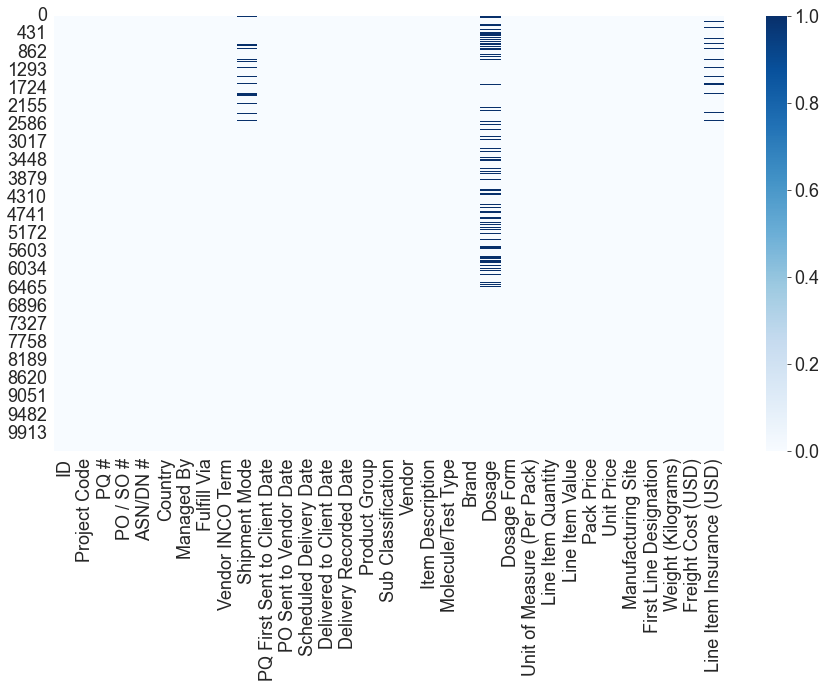

In [11]:
# heatmap for null values
sns.heatmap(df.isnull(), cmap ="Blues")

In [12]:
# chexking duplicated values
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10319    False
10320    False
10321    False
10322    False
10323    False
Length: 10324, dtype: bool

In [13]:
# chexking duplicated values
df.duplicated().sum()

0

**Observation**

There is no duplicated values present in dataset

In [14]:
# statasic analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10324.0,51098.968229,31944.332496,1.0,12795.7500,57540.500,83648.2500,86823.00
Unit of Measure (Per Pack),10324.0,77.990895,76.579764,1.0,30.0000,60.000,90.0000,1000.00
Line Item Quantity,10324.0,18332.534870,40035.302961,1.0,408.0000,3000.000,17039.7500,619999.00
Line Item Value,10324.0,157650.567347,345292.066979,0.0,4314.5925,30471.465,166447.1400,5951990.40
Pack Price,10324.0,21.910241,45.609223,0.0,4.1200,9.300,23.5925,1345.64
Unit Price,10324.0,0.611701,3.275808,0.0,0.0800,0.160,0.4700,238.65
Line Item Insurance (USD),10037.0,240.117626,500.190568,0.0,6.5100,47.040,252.4000,7708.44


In [15]:
df.describe(include=object).T

,count,unique,top,freq
Project Code,10324,142,116-ZA-T30,768
PQ #,10324,1237,Pre-PQ Process,2681
PO / SO #,10324,6233,SCMS-199289,67
ASN/DN #,10324,7030,ASN-19166,54
Country,10324,43,South Africa,1406
Managed By,10324,4,PMO - US,10265
Fulfill Via,10324,2,From RDC,5404
Vendor INCO Term,10324,8,N/A - From RDC,5404
Shipment Mode,9964,4,Air,6113
PQ First Sent to Client Date,10324,765,Pre-PQ Process,2476


# **EDA**

In [16]:
# Dictionaries with ID as keys and weight/freight as values
id_weight = dict(zip(df['ID'],df['Weight (Kilograms)']))
id_freight = dict(zip(df['ID'],df['Freight Cost (USD)']))

In [17]:
# Functions to get weight and freight from corresponding ID numbers
def get_weight(data):
    data = pd.to_numeric(data, errors = 'ignore')
    if type(data) == str:
        try:
            d = data.split(':')
            e = d[1][:-1]
            return id_weight.get(int(e))
        except:
            return (data)
    else:
        return (data)
    
def get_freight(data):
    data = pd.to_numeric(data, errors = 'ignore')
    if type(data) == str:
        try:
            d = data.split(':')
            e = d[1][:-1]
            return id_freight.get(int(e))
        except:
            return (data)
    else:
        return (data)

In [18]:
#Convering dates into datetime format. For 'PQ First Sent to Client Date' ,'PO Sent to Vendor Date ' . Coerce the errors as some of the dates are not defined.
dt = ['PQ First Sent to Client Date' ,'PO Sent to Vendor Date','Scheduled Delivery Date','Delivered to Client Date', 'Delivery Recorded Date']
for col in dt:
    df[col] = pd.to_datetime(df[col], errors = 'coerce')

In [19]:
# analysis of traget columns : Freight Cost (USD)
# total no of different values
df['Freight Cost (USD)'].value_counts()

Freight Included in Commodity Cost    1442
Invoiced Separately                    239
9736.1                                  36
6147.18                                 27
13398.06                                16
                                      ... 
749.36                                   1
7060.97                                  1
7616.19                                  1
12793.7                                  1
See DN-4282 (ID#:83919)                  1
Name: Freight Cost (USD), Length: 6733, dtype: int64

In [20]:
# Tackling Weight & Freight missing values
df['Freight Cost (USD)'] = df['Freight Cost (USD)'].replace('Freight Included in Commodity Cost',0)

In [21]:
df['Weight (Kilograms)'] = df['Weight (Kilograms)'].apply(get_weight)
df['Freight Cost (USD)'] = df['Freight Cost (USD)'].apply(get_freight)

In [22]:
df['Weight (Kilograms)'] = pd.to_numeric(df['Weight (Kilograms)'], errors = 'coerce')
df['Freight Cost (USD)'] = pd.to_numeric(df['Freight Cost (USD)'], errors = 'coerce')

In [23]:
df['Weight (Kilograms)'] = df['Weight (Kilograms)'].fillna(df['Weight (Kilograms)'].mean())
df['Freight Cost (USD)'] = df['Freight Cost (USD)'].fillna(df['Freight Cost (USD)'].mean())

In [24]:
# Replace NAN with mode in Dosage column
df['Dosage'] = df['Dosage'].fillna(df['Dosage'].mode()[0])

In [25]:
# Drop rows with no shipment mode
missing_shipment = df[df['Shipment Mode'].isna()].index
df = df.drop(missing_shipment, axis=0).reset_index(drop= True)

In [26]:
# Fill Insurance with percentage value of line item value
perc = df['Line Item Insurance (USD)'].sum() / df['Line Item Value'][df['Line Item Insurance (USD)'] >= 0].sum()
df['Line Item Insurance (USD)'] = df['Line Item Insurance (USD)'].fillna(round(df['Line Item Value']*perc, 2))

In [27]:
# Fill PO & PQ dates
#Calculate Average days between Price Quote-->Purchase Order--> Scheduled Delivery
pq_del_days = round((df['Scheduled Delivery Date'] - df['PQ First Sent to Client Date']).dt.days.mean(),0)
pq_po_days = round((df['PO Sent to Vendor Date'] - df['PQ First Sent to Client Date']).dt.days.mean(),0)
po_del_days = round((df['Scheduled Delivery Date'] - df['PO Sent to Vendor Date']).dt.days.mean(),0)

In [28]:
print (pq_del_days)
print (pq_po_days)
print (po_del_days)

172.0
54.0
106.0


In [29]:
from datetime import timedelta
# Assigning estimated dates of Price Quotation and Purchase Order
df['PQ First Sent to Client Date'] = df['PQ First Sent to Client Date'].fillna(df['Scheduled Delivery Date'] - timedelta(days=pq_del_days))
df['PO Sent to Vendor Date'] = df['PO Sent to Vendor Date'].fillna(df['Scheduled Delivery Date'] - timedelta(days=po_del_days))


In [30]:
df.to_csv("Clean_df")

# Data Visualization

<AxesSubplot:>

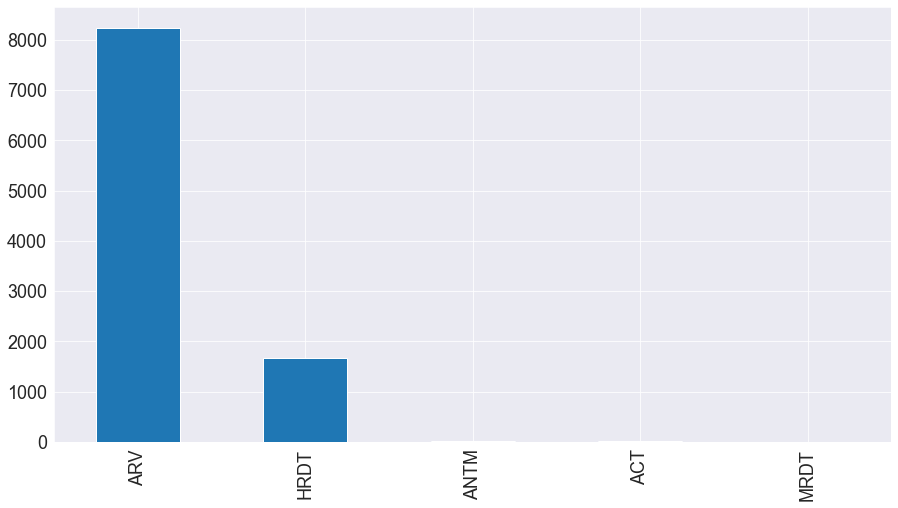

In [31]:
df["Product Group"].value_counts().plot(kind='bar')

<AxesSubplot:>

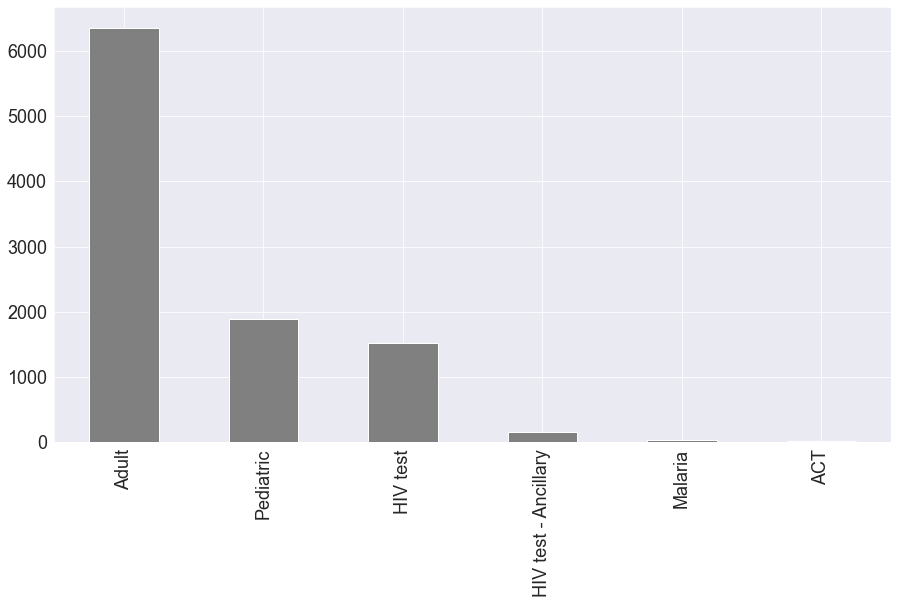

In [32]:
df["Sub Classification"].value_counts().plot(kind="bar", color ='grey')

In [33]:
sns.countplot(df,x ='Country',
              order = df['Country'].value_counts().nlargest(10).index)
plt.title('Top 10 Countries Wise Count \n')
plt.xticks(rotation = 45)
plt.ylabel('Total Count')
plt.xlabel('Country Name')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
df.groupby(['Country'])['Pack Price'].sum().nlargest(15).plot(kind='bar')
plt.title("Total Pack Price for Top 15 Countries")
plt.xticks(rotation = 45)
plt.ylabel('Total Pack Price')
plt.xlabel('Country Name')

In [ ]:
counts = df['Country'].value_counts()
idx = counts[counts.lt(60)].index
df.loc[df['Country'].isin(idx), 'Country'] = 'Others'
df["Country"].value_counts().plot.pie(label='',title="Country",legend=True,figsize=(9,9),autopct='%1.0f%%',labeldistance=None)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:
counts = df['Manufacturing Site'].value_counts()
idx = counts[counts.lt(20)].index
df.loc[df['Manufacturing Site'].isin(idx), 'Manufacturing Site'] = 'Others'
df["Manufacturing Site"].value_counts().plot(kind="bar",figsize=(10,10),color ='yellow')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:
counts = df['Vendor'].value_counts()
idx = counts[counts.lt(30)].index
df.loc[df['Vendor'].isin(idx), 'Vendor'] = 'Others'
df["Vendor"].value_counts().plot.pie(label='',title="Vendor",legend=True,figsize=(9,9),autopct='%1.0f%%',labeldistance=None)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:
df['First Line Designation'].value_counts()

In [ ]:
sns.countplot(df,x ="First Line Designation",order = df['First Line Designation'].value_counts().nlargest(10).index)
plt.title('First Line Designation Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('First Line Designation')

In [ ]:
print("The sum of Generic Unit Price total is ", df[df['Brand']=='Generic']['Unit Price'].sum())
px.bar(df.groupby('Brand')['Unit Price'].count().sort_values(ascending=False), title='Count of Unit Prices wrt Brands')

**As shown Generic Brand has the maximum total count of unit price i.e. 7285 with the total sum of 1287.32. This means that count of shipping of Generic brand is more than any other brand**

In [ ]:
px.bar(df.groupby('Brand')['Unit Price'].sum().sort_values(ascending = False), title='Sum of Unit Prices wrt Brands',color_discrete_sequence =['red']*3)

1. Though as explained in above graph, the maximum cost of unit price shipped is for brand Colloidal Gold, though count is maximum for Generic which comes at second number in total cost of unit price shipping.

2. This shows that Colloidal Brand has shipped maximum cost in just 70 counts whereas, generic has shipped only 0.7633% of colloidal in 7285 counts. Seems, genric brand is in good growing phase where customer trails the product in small packets.

3. Other brand which is growing phase is Determines which sold 791.67 in 799 counts. Seems like, the growing phase of Determines is better than generic though the selling cost is less, because the ratio of count and selling cost is more of determines than generic. 

In [ ]:
px.bar(df.groupby('Country')['Unit Price'].sum()/df.groupby('Country')['Unit Price'].count(), 
       title='Ratio of Sum to Count of Unit Prices wrt Country')

1. The above graph is displaying the ratio of sum and count. The maximum ratio is of Mali i.e. 6.10 means the maximum shipping cost of unit price is done for Mali country with minimum no. of shipping times. Opposite to this, Country Burkina Faso has the ratio 0.09 means maximum count of shipping but still cost of shipping is least.
2. The country Mali is said to have maximum cost in export followed by Ethiopia, Botswana and Kazakhstan.
3. If the ratio is more means the sum of export of unit price is more than the number of times the export has been done from particular country.

In [ ]:
px.bar(df.groupby('Dosage Form')['Pack Price'].sum().sort_values(ascending = False), title='Sum of Pack Prices wrt Vendor',color_discrete_sequence =['black']*3)

1. Maximum Pack Price of Test Kit with 115k cost is shipped followed by Tablet with 50.03k cost. This implies may be that citizens prefer to go for test kit and tablet rather than any other form of dosage.
2. But this also means that may be test kits are more costly than any other form. It can be possible that supply of test kit is least but since may be test kit is costly thats why the bar of test kit is highest.

In [ ]:
ShippingMode = df["Shipment Mode"].value_counts()
labels = (np.array(ShippingMode.index))
sizes = (np.array((ShippingMode / ShippingMode.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Shipment Mode")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="Shipment Mode")

In [ ]:
plt.figure(figsize=(22,6))
TopFiveManufacturingSite=df.groupby('Manufacturing Site').size().nlargest(10)
print(TopFiveManufacturingSite)
TopFiveManufacturingSite.plot(kind='bar')
plt.title('Top 10 Manufacturing Site \n')
plt.ylabel('Total Count')
plt.xlabel('Manufacturing Site Name')

In [ ]:
# Top 10 Air Shipment Mode in Bar Chart
ItemData=df[df['Shipment Mode']=='Air']
df[df["Shipment Mode"]=='Air']['Manufacturing Site'].value_counts()[0:10].to_frame().plot.bar(figsize=(22,6))
ItemSupplier = df[df["Shipment Mode"]=='Air']['Manufacturing Site'].value_counts()[0:10]
print("Top 10 Air Manufacturing Site \n")
print(ItemSupplier)
plt.title('Top 10 Air Manufacturing Site\n')
plt.ylabel('Air Count')
plt.xlabel('Manufacturing Site')

In [ ]:
plt.subplots(figsize = (18,6))
plt.xticks(rotation = 90)
sns.barplot(x='Shipment Mode',y= 'Pack Price', data = df)
plt.show()

In [ ]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end='\n')
    
    print("\n Skewness of " + column)
    print("----------------------------------------------------------------------------")
    print(np.round(df[column].skew(),4),end='\n')
    
    print("\n Histogram and Boxplot of " + column)
    print("----------------------------------------------------------------------------")
    fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(14,5))
    print(sns.histplot(df[column], kde=True, color='c', ax=axs[0]))
    print(sns.boxplot(x=df[column], ax=axs[1],color='r'))
    plt.show();

In [ ]:
for column in df.columns:
    if (df[column].dtype != 'object')and(df[column].dtype != 'datetime64[ns]'):
        print(univariateAnalysis_numeric(column,60))

# Outlier detection:

In [ ]:
num_cols = df.select_dtypes(include =['int', 'float']).columns
print(num_cols)

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(20,20))
index = 0
ax = ax.flatten()

for col in num_cols :
    if col != 'ID':
        sns.boxplot(x=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle('Distribution of numerical feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
numeric_features = [feature for feature in df.columns if (df[feature].dtype != 'O'and df[feature].dtype != 'datetime64[ns]')]
for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [ ]:
df1 = df.copy()
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[df1[col] > upper_limit]

In [ ]:

for i in num_cols:
  if i != "ID":
    remove_outliers_IQR(i)

In [ ]:
def create_comparison_plot(df,df1,column):
    # Comparing
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[column])

    plt.subplot(2,2,2)
    sns.boxplot(df[column])

    plt.subplot(2,2,3)
    sns.distplot(df1[column])

    plt.subplot(2,2,4)
    sns.boxplot(df1[column])

    plt.show()

In [ ]:
for i in num_cols:
  if i != "ID":
    create_comparison_plot(df,df1,i)


In [ ]:
df.skew()

In [ ]:
df1.skew()

In [ ]:
df1.corr()

In [ ]:
# heatmap for correlations
sns.heatmap(df.corr(), annot=True,cmap="Blues")

**Observation**
1. **Freight Cost(USD)** has highest correlation with **Line Item Quantity, Line Item values, Weight(KG) and Line Item Insurance(USD)**
2. **Freight Cost(USD)** has least correlation with Unit Of **Measure, Pack Price and unit price**
3. **Line Item Insurance** has highest correlation with Line **Item Quantity and line Item values**
4. Unit price and pack price has least correlation with other columns
5. **Line Item Quantity** has highest correlation with L**ine Item Values around 84%** and **96% with Line Item Insurance**

In [ ]:
sns.pairplot(df1[num_cols])

# Feature Enginnering :

**Shapiro Wick Test**

In [ ]:
from scipy.stats import shapiro
shapiro_wick_test = []
for column in num_cols:

    dataToTest = df1[column]
    stat,p = shapiro(dataToTest)
    if p > 0.05:
        shapiro_wick_test.append("Normally Distributed")
    else:
        shapiro_wick_test.append("Not Normally Distributed")
result = pd.DataFrame(data=[num_cols, shapiro_wick_test]).T
result.columns = ['Column Name', 'Shapiro Hypothesis Result']
result

**K^2 Normality Test**

In [ ]:
from scipy.stats import normaltest
normaltest_test = []
for column in num_cols:
    dataToTest = df1[column]
    stat,p = normaltest(dataToTest)
    if p > 0.05:
        normaltest_test.append("Normally Distributed")
    else:
        normaltest_test.append("Not Normally Distributed")
result = pd.DataFrame(data=[num_cols, normaltest_test]).T
result.columns = ['Column Name', 'normaltest Hypothesis Result']
result

In [ ]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

def test_correlation(test_name,column1, column2):
    column1_to_test = df1[column1]
    column2_to_test = df1[column2]
    stat,p = test_name(column1_to_test , column2_to_test)
    d =dict()
    d['col1'] = column1
    d['col2'] = column2
    if p> 0.05:
        test_results.append("Independent Samples")
    else:
        test_results.append("Dependent Samples")
    columns_combination.append(d)

In [ ]:
num_cols

**Spearmanr Test**

In [ ]:
columns_combination = []
test_results = []
columns=[ 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Weight (Kilograms)',
       'Freight Cost (USD)', 'Line Item Insurance (USD)']
for i in columns:
  for j in columns:
    test_correlation(spearmanr,i,j)

In [ ]:
df_spearmanr = pd.DataFrame(columns_combination,test_results)
df_spearmanr

# Chi2 Test

In [ ]:
cat = df1.select_dtypes(include =['object'])

In [ ]:
cat_cols = cat.columns

In [ ]:
cat_cols

In [ ]:
from scipy.stats import chi2_contingency
chi2_squared_test = []
for feature in cat_cols:
    stat, p , dof, expected = chi2_contingency(pd.crosstab(df1['Freight Cost (USD)'], df1[feature]))
    if p> 0.05:
        chi2_squared_test.append("Independent Categories")
    else:
        chi2_squared_test.append("Dependent Categories")
result = pd.DataFrame(data=[cat_cols, chi2_squared_test]).T
result.columns = ['Column Name', 'Hypothesis Result']
result

# VIF

In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calu_vif(dataset):
    vif = pd.DataFrame()
    vif['feature'] = dataset.columns
    vif['Vif_values'] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    return vif


In [ ]:
calu_vif(df)

In [ ]:
import statsmodels.api as sm # to build the Q-Q graph
# Create three subplots 

for i in num_cols:
  if i !='ID':
    sm.qqplot(df[i],markerfacecolor = "green", markeredgecolor = "green", line='45',  fit = True,)

# Set the global title
plt.suptitle("Normality check of data without removing outlier using Q-Q chart")

plt.show()

In [ ]:
import statsmodels.api as sm # to build the Q-Q graph
# Create three subplots 

for i in num_cols:
  if i !='ID':
    sm.qqplot(df1[i],markerfacecolor = "green", markeredgecolor = "green", line='45',  fit = True,)

# Set the global title
plt.suptitle("Normality check of data with removing outlier using Q-Q chart")

plt.show()

In [ ]:
df1.to_csv("Removed oultiered.csv")